<a href="https://colab.research.google.com/github/Adetowobola/Covid_dataset/blob/main/Mini_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt



#Data Collection
Data was collected and Loaded into pandas
the data was rapidly viewed to check for structures ,data type, shape etc

In [ ]:
#Loading my Covid dataset and viewing the first 5 and last 5 rows

Covid_dataset = pd.read_csv("/content/drive/MyDrive/Covid Dataset.csv")

print([Covid_dataset.head()], "\n")
print([Covid_dataset.tail()])

[         DATE    country  NEW Cases  NEW_DEATHS vaccinated
0  2024-11-01  Argentina        NaN         NaN    unknown
1  2024-11-01  Australia        0.0         0.0        327
2  2024-11-01  Australia        0.0         0.0        327
3  2024-11-01     Brazil      971.0        48.0        430
4  2024-11-01     Canada      176.0         8.0    unknown] 

[           DATE country  NEW Cases  NEW_DEATHS vaccinated
160  2024-11-30  Brazil      514.0        25.0    unknown
161  2024-11-30  Canada     1133.0        56.0        438
162  2024-11-30  Canada     1133.0        56.0        438
163  2024-11-30   China        0.0         0.0    unknown
164  2024-11-30   China        0.0         0.0    unknown]


#Data Cleaning
Data was checked for dupliates , missing values and cleaned appopriately .
Date was appopriately formated from object to Datetime frame
Column header was renamed by removing empty spaces,replacing with underscore and capitalized

In [ ]:
#creating a list of missing values
missing_vals = ["NaN", "unknown"]

Covid_dataset = pd.read_csv("/content/drive/MyDrive/Covid Dataset.csv", na_values= missing_vals)

Covid_dataset.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,NaN
1,2024-11-01,Australia,0.0,0.0,327.0
2,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,NaN


In [ ]:
#renaming columns
col_names = [col.strip().upper().replace(" ","_") for col in Covid_dataset.columns]
Covid_dataset.columns = col_names
Covid_dataset.columns

Index(['DATE', 'COUNTRY', 'NEW_CASES', 'NEW_DEATHS', 'VACCINATED'], dtype='object')

In [ ]:
#checking the general overview of Data information including the Datatypes and Null values
Covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        165 non-null    object 
 1   COUNTRY     165 non-null    object 
 2   NEW_CASES   154 non-null    float64
 3   NEW_DEATHS  139 non-null    float64
 4   VACCINATED  148 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
#Converting the Date column to datetime format
Covid_dataset["DATE"] = pd.to_datetime(Covid_dataset["DATE"], format="mixed")

#Standardizing the Date column to all have yyyy/mm/dd format
Covid_dataset["DATE"].dt.strftime("%Y-%m-%d")

,DATE
0,2024-11-01
1,2024-11-01
2,2024-11-01
3,2024-11-01
4,2024-11-01
...,...
160,2024-11-30
161,2024-11-30
162,2024-11-30
163,2024-11-30


In [ ]:
#confirming change of Date to datetime
Covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        165 non-null    datetime64[ns]
 1   COUNTRY     165 non-null    object        
 2   NEW_CASES   154 non-null    float64       
 3   NEW_DEATHS  139 non-null    float64       
 4   VACCINATED  148 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 6.6+ KB


In [ ]:
#checking the number of rows and columns of dataset
Covid_dataset.shape

(165, 5)

In [ ]:
#checking if data contains duplicate values
Covid_dataset.duplicated()

,0
0,False
1,False
2,True
3,False
4,False
...,...
160,False
161,False
162,True
163,False


In [ ]:
#checking the Total no of the duplicate values
Covid_dataset.duplicated().sum()

np.int64(15)

Data was found to contain 15 duplicates which were removed appopriately

In [ ]:
#viewing all duplicate rows
Covid_dataset[Covid_dataset.duplicated()]

,DATE,COUNTRY,NEW_CASES,NEW_DEATHS,VACCINATED
2,2024-11-01,Australia,0.0,0.0,327.0
19,2024-11-04,Brazil,793.0,39.0,137.0
39,2024-11-08,Australia,313.0,15.0,486.0
69,2024-11-14,Argentina,806.0,40.0,11.0
84,2024-11-16,China,727.0,36.0,326.0
86,2024-11-17,Argentina,759.0,NaN,397.0
89,2024-11-17,Brazil,18.0,0.0,37.0
97,2024-11-18,China,94.0,4.0,138.0
104,2024-11-20,Argentina,589.0,29.0,120.0
107,2024-11-20,Brazil,587.0,29.0,11.0


In [ ]:
#removing all the duplicate rows above
New_Covid_dataset = Covid_dataset.drop_duplicates()

In [ ]:
New_Covid_dataset.head()

,DATE,COUNTRY,NEW_CASES,NEW_DEATHS,VACCINATED
0,2024-11-01,Argentina,NaN,NaN,NaN
1,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,NaN
5,2024-11-01,China,1034.0,51.0,462.0


In [ ]:
#confirming if duplicates data has been dropped
New_Covid_dataset.duplicated().sum()

np.int64(0)

In [ ]:
#checking for missing  values
New_Covid_dataset.isnull()


,DATE,COUNTRY,NEW_CASES,NEW_DEATHS,VACCINATED
0,False,False,True,True,True
1,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True
5,False,False,False,False,False
...,...,...,...,...,...
158,False,False,False,False,True
159,False,False,False,False,False
160,False,False,False,False,True
161,False,False,False,False,False


In [ ]:
#checking for the Total no of missing values
New_Covid_dataset.isnull().sum()

,0
DATE,0
COUNTRY,0
NEW_CASES,11
NEW_DEATHS,25
VACCINATED,16


In [ ]:
#viewing all rows that has missing values
New_Covid_dataset.loc[New_Covid_dataset.isnull().any(axis=1)]

,DATE,COUNTRY,NEW_CASES,NEW_DEATHS,VACCINATED
0,2024-11-01,Argentina,NaN,NaN,NaN
4,2024-11-01,Canada,176.0,8.0,NaN
7,2024-11-02,Australia,0.0,NaN,336.0
12,2024-11-03,Australia,NaN,NaN,474.0
13,2024-11-03,Brazil,641.0,NaN,47.0
21,2024-11-04,China,696.0,34.0,NaN
22,2024-11-05,Argentina,283.0,NaN,41.0
30,2024-11-06,Canada,152.0,NaN,421.0
37,2024-11-08,Argentina,665.0,33.0,NaN
40,2024-11-08,Brazil,212.0,NaN,313.0


In [ ]:
  #rows with 3 null values
  New_Covid_dataset[New_Covid_dataset.isnull().sum(axis=1)==3]

,DATE,COUNTRY,NEW_CASES,NEW_DEATHS,VACCINATED
0,2024-11-01,Argentina,NaN,NaN,NaN
76,2024-11-15,Brazil,NaN,NaN,NaN
92,2024-11-18,Argentina,NaN,NaN,NaN


Three rows were found to contain at least 3 null values but i decided to keep them and fill the null available because i wanted to maintain the 30days for each country

In [ ]:
#calcualting the percent null.
percent_null = ((New_Covid_dataset.isnull().sum())/(len(New_Covid_dataset.index)))*100

percent_null.round(2)

,0
DATE,0.00
COUNTRY,0.00
NEW_CASES,7.33
NEW_DEATHS,16.67
VACCINATED,10.67


The misssing values for the 3 missing columns were each greater than 7%. removing it may skew my data , so i decided to keep and fill using mean imputation

In [ ]:
New_Covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 163
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        150 non-null    datetime64[ns]
 1   COUNTRY     150 non-null    object        
 2   NEW_CASES   139 non-null    float64       
 3   NEW_DEATHS  125 non-null    float64       
 4   VACCINATED  134 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 7.0+ KB


In [ ]:
#No of Unique countries in the dataset
New_Covid_dataset["COUNTRY"].nunique()

5

In [ ]:
#List of countries in the dataset
New_Covid_dataset["COUNTRY"].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China'],
      dtype=object)

#Imputation using Mean
The Imputation for mean for New deaths, New cases and vaccinated was calculated based on each country data.
country was grouped and mean of each country was calculated , Afterwards missing values were imputed based on mean new deaths, new cases and vaccinated for each country

In [ ]:
New_Covid_dataset.loc[:, "NEW_DEATHS"] = New_Covid_dataset.groupby("COUNTRY")["NEW_DEATHS"].transform(lambda x: x.fillna(x.mean()))
New_Covid_dataset.loc[:, "NEW_CASES"] = New_Covid_dataset.groupby("COUNTRY")["NEW_CASES"].transform(lambda x: x.fillna(x.mean()))
New_Covid_dataset.loc[:, "VACCINATED"] = New_Covid_dataset.groupby("COUNTRY")["VACCINATED"].transform(lambda x: x.fillna(x.mean()))

New_Covid_dataset

,DATE,COUNTRY,NEW_CASES,NEW_DEATHS,VACCINATED
0,2024-11-01,Argentina,765.071429,38.44,236.434783
1,2024-11-01,Australia,0.000000,0.00,327.000000
3,2024-11-01,Brazil,971.000000,48.00,430.000000
4,2024-11-01,Canada,176.000000,8.00,405.586207
5,2024-11-01,China,1034.000000,51.00,462.000000
...,...,...,...,...,...
158,2024-11-30,Argentina,1619.000000,80.00,236.434783
159,2024-11-30,Australia,1473.000000,73.00,428.000000
160,2024-11-30,Brazil,514.000000,25.00,196.629630
161,2024-11-30,Canada,1133.000000,56.00,438.000000


checking for missing values after mean imputation

In [ ]:
New_Covid_dataset.isnull().sum()

,0
DATE,0
COUNTRY,0
NEW_CASES,0
NEW_DEATHS,0
VACCINATED,0


#Summary of statistics

In [ ]:
#statistical summary of numerical data for dataset
New_Covid_dataset.describe(include = ["number"])

,NEW_CASES,NEW_DEATHS,VACCINATED
count,150.000000,150.000000,150.000000
mean,585.237628,29.151033,302.691662
std,395.898878,19.224733,143.510466
min,0.000000,0.000000,2.000000
25%,314.750000,17.000000,191.250000
50%,588.500000,29.000000,337.500000
75%,791.000000,38.440000,424.250000
max,1730.000000,86.000000,499.000000


In [ ]:
#covid new cases by country
New_Covid_dataset_grouped_cases = New_Covid_dataset.groupby("COUNTRY")["NEW_CASES"].sum().reset_index()
New_Covid_dataset_grouped_cases.sort_values("NEW_CASES", ascending= False)

,COUNTRY,NEW_CASES
0,Argentina,22952.142857
1,Australia,22436.785714
3,Canada,14868.214286
4,China,14209.655172
2,Brazil,13318.846154


Argentina had the Highest Total New cases(22952.14) for Covid followed by Australia , Canada and China with Brazil having the least Total New cases (13318.85)for Covid





In [ ]:
#covid new deaths by country
New_Covid_dataset_grouped_Deaths = New_Covid_dataset.groupby("COUNTRY")["NEW_DEATHS"].sum().reset_index()
New_Covid_dataset_grouped_Deaths.sort_values("NEW_DEATHS", ascending= False)

,COUNTRY,NEW_DEATHS
0,Argentina,1153.200000
1,Australia,1124.347826
3,Canada,726.000000
4,China,717.857143
2,Brazil,651.250000


Similarly, Argentina had the Highest Total New deaths(1153.20) for Covid followed by Australia , Canada and China with Brazil having the least(651.25) Total New deaths for Covid

In [ ]:
#covid vaccinated by country
New_Covid_dataset_grouped_vaccinated = New_Covid_dataset.groupby("COUNTRY")["VACCINATED"].sum().reset_index()
New_Covid_dataset_grouped_vaccinated.sort_values("VACCINATED", ascending= False)

,COUNTRY,VACCINATED
1,Australia,12360.000000
3,Canada,12167.586207
4,China,7884.230769
0,Argentina,7093.043478
2,Brazil,5898.888889


Australia had the Highest Total vaccinated (12360.00)for Covid followed by Canada, China and Argentina with Brazil having the least Total (5898.89)vaccinated for Covid

In [ ]:
#covid new cases by Date
New_Covid_dataset_grouped_casesDate = New_Covid_dataset.groupby("DATE")["NEW_CASES"].sum().reset_index()
New_Covid_dataset_grouped_casesDate.sort_values("NEW_CASES", ascending= False)

,DATE,NEW_CASES
25,2024-11-26,5055.000000
29,2024-11-30,4739.000000
28,2024-11-29,4439.961538
26,2024-11-27,4319.607143
27,2024-11-28,4303.000000
22,2024-11-23,4194.000000
20,2024-11-21,3964.000000
13,2024-11-14,3828.000000
15,2024-11-16,3469.000000
24,2024-11-25,3308.892857


for the Covid new cases 26th of november 2024 had the Total highest date(5055 new cases) with 10th of november 2024 been the date with least Total New case(1125 new cases)

In [ ]:
#covid new deaths by Date
New_Covid_dataset_grouped_deathsDate = New_Covid_dataset.groupby("DATE")["NEW_DEATHS"].sum().reset_index()
New_Covid_dataset_grouped_deathsDate.sort_values("NEW_DEATHS", ascending= False)

,DATE,NEW_DEATHS
25,2024-11-26,250.000000
29,2024-11-30,234.000000
28,2024-11-29,219.708333
22,2024-11-23,207.000000
27,2024-11-28,198.200000
26,2024-11-27,197.678261
20,2024-11-21,196.000000
13,2024-11-14,189.000000
15,2024-11-16,171.000000
24,2024-11-25,163.478261


Similarly,for the Covid new deaths 26th of november 2024 had the highest Total covid deaths(250 new deaths) with 10th of november 2024 been the date with least Total New deaths(54 new deaths)

In [ ]:
#covid vaccinated by Date
New_Covid_dataset_grouped_vaccDate = New_Covid_dataset.groupby("DATE")["VACCINATED"].sum().reset_index()
New_Covid_dataset_grouped_vaccDate.sort_values("VACCINATED", ascending= False)

,DATE,VACCINATED
10,2024-11-11,2081.000000
0,2024-11-01,1861.020990
7,2024-11-08,1795.434783
3,2024-11-04,1715.807692
4,2024-11-05,1681.000000
21,2024-11-22,1679.000000
17,2024-11-18,1674.434783
2,2024-11-03,1635.000000
5,2024-11-06,1625.000000
25,2024-11-26,1625.000000


for the Covid vaccinated 11th of november 2024 had the Total highest (2081 vaccinated) with 7th of november 2024 been the date with least Total vaccinated(1099 vaccinated)

In [ ]:
#Grouping and calculating new cases, deaths and vaccinated by country
New_Covid_dataset.groupby("COUNTRY").agg({"NEW_CASES": ["sum","mean","median","max","min","std"], "NEW_DEATHS": ["sum","mean","median","max","min","std"], "VACCINATED":["sum","mean","median","max","min","std"]}).round(2)

NEW_CASES                                       NEW_DEATHS         \
                sum    mean  median     max   min     std        sum   mean   
COUNTRY                                                                       
Argentina  22952.14  765.07  755.00  1661.0  23.0  436.72    1153.20  38.44   
Australia  22436.79  747.89  748.45  1730.0   0.0  474.12    1124.35  37.48   
Brazil     13318.85  443.96  443.96   971.0  10.0  275.82     651.25  21.71   
Canada     14868.21  495.61  578.50  1133.0   0.0  300.84     726.00  24.20   
China      14209.66  473.66  458.83  1093.0   0.0  347.19     717.86  23.93   

                                   VACCINATED                                \
          median   max  min    std        sum    mean  median    max    min   
COUNTRY                                                                       
Argentina  38.44  83.0  1.0  21.37    7093.04  236.43  236.43  451.0   11.0   
Australia  37.48  86.0  0.0  22.30   12360.00  412.00  424.50  499.0  314.0   
Brazil     21.71  48.0  0.0  13.45    5898.89  196.63  170.50  498.0    2.0   
Canada     24.20  56.0  0.0  14.32   12167.59  405.59  404.79  499.0  309.0   
China      23.93  54.0  0.0  16.93    7884.23  262.81  262.81  493.0   17.0   

                   
              std  
COUNTRY            
Argentina  125.06  
Australia   59.21  
Brazil     153.54  
Canada      60.11  
China      135.45

In [ ]:
#checking the correlation between the numerical columns of new cases , new deaths and vaccinated
numerical_columns = New_Covid_dataset.select_dtypes(include = "number").columns
numerical_columns
New_Covid_dataset[numerical_columns].corr().round(2)

,NEW_CASES,NEW_DEATHS,VACCINATED
NEW_CASES,1.00,0.97,0.11
NEW_DEATHS,0.97,1.00,0.09
VACCINATED,0.11,0.09,1.00


New cases had the strongest positive correlation value of 1.0 followed by New deaths 0.97 with vaccinated having a low correlation value of 0.11

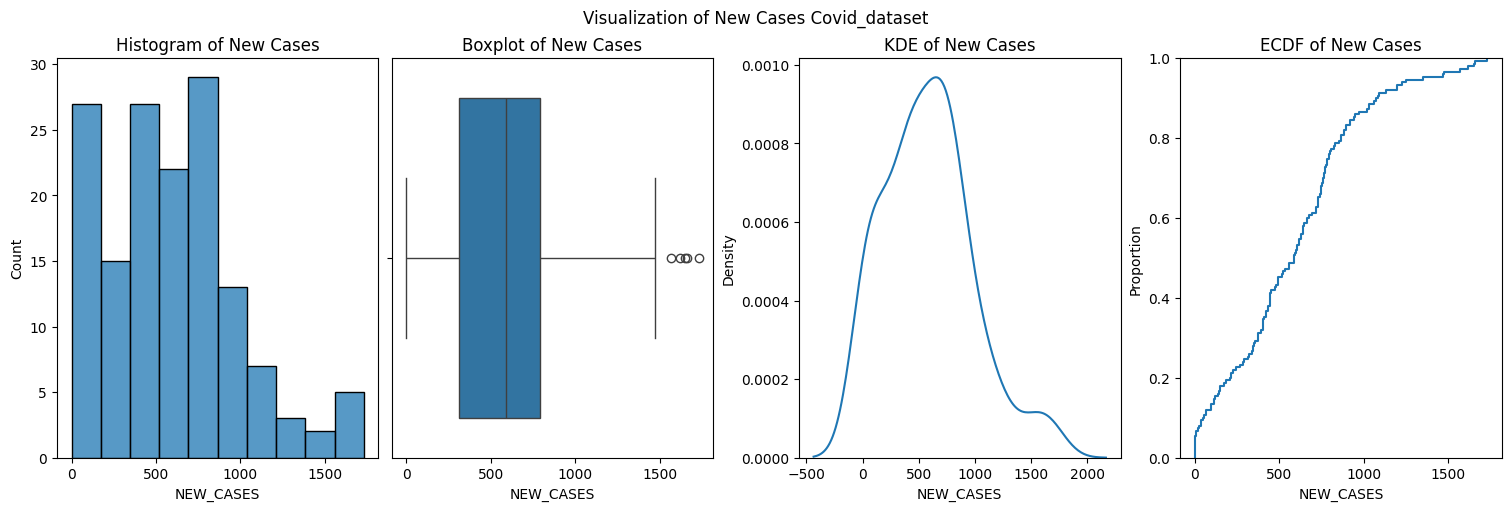

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (15,5), layout= "constrained")
plt.suptitle("Visualization of New Cases Covid_dataset")

axs[0].set_title("Histogram of New Cases")
sns.histplot(data= New_Covid_dataset, x= "NEW_CASES", ax=axs[0])

axs[1].set_title("Boxplot of New Cases")
sns.boxplot(data= New_Covid_dataset, x= "NEW_CASES", ax=axs[1])

axs[2].set_title("KDE of New Cases")
sns.kdeplot(data= New_Covid_dataset, x= "NEW_CASES", ax=axs[2])

axs[3].set_title("ECDF of New Cases")
sns.ecdfplot(data= New_Covid_dataset, x= "NEW_CASES", ax=axs[3]);

plt.show()

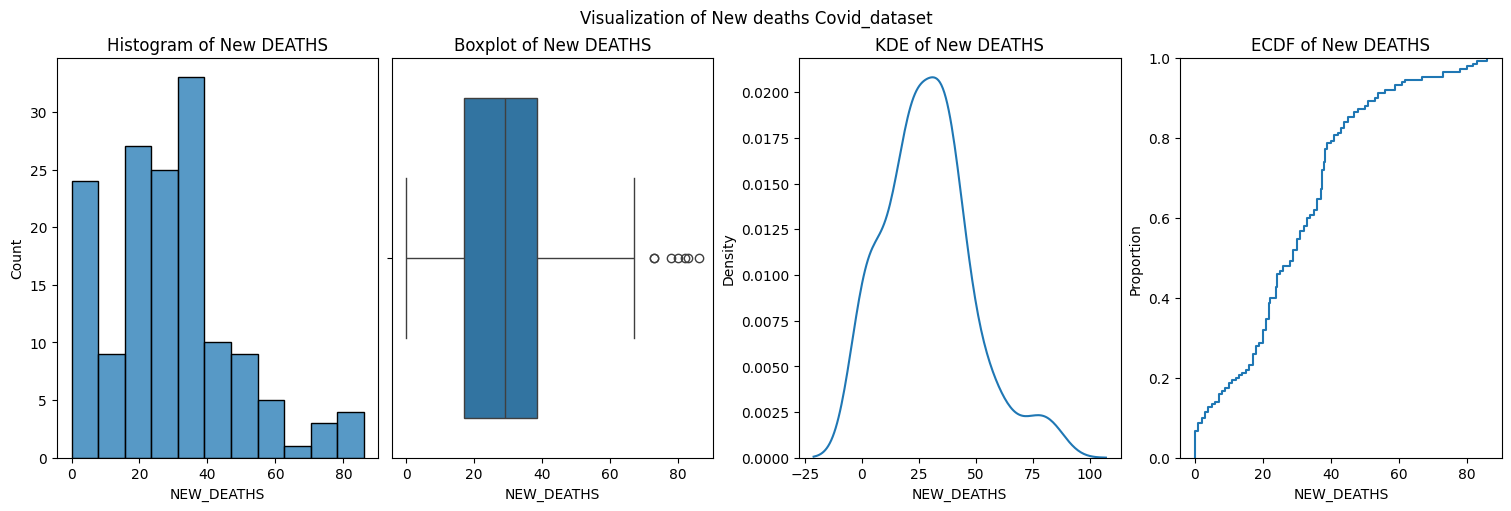

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (15,5), layout= "constrained")
plt.suptitle("Visualization of New deaths Covid_dataset")

axs[0].set_title("Histogram of New DEATHS")
sns.histplot(data= New_Covid_dataset, x= "NEW_DEATHS", ax=axs[0])

axs[1].set_title("Boxplot of New DEATHS")
sns.boxplot(data= New_Covid_dataset, x= "NEW_DEATHS", ax=axs[1])

axs[2].set_title("KDE of New DEATHS")
sns.kdeplot(data= New_Covid_dataset, x= "NEW_DEATHS", ax=axs[2])

axs[3].set_title("ECDF of New DEATHS")
sns.ecdfplot(data= New_Covid_dataset, x= "NEW_DEATHS", ax=axs[3]);

plt.show()

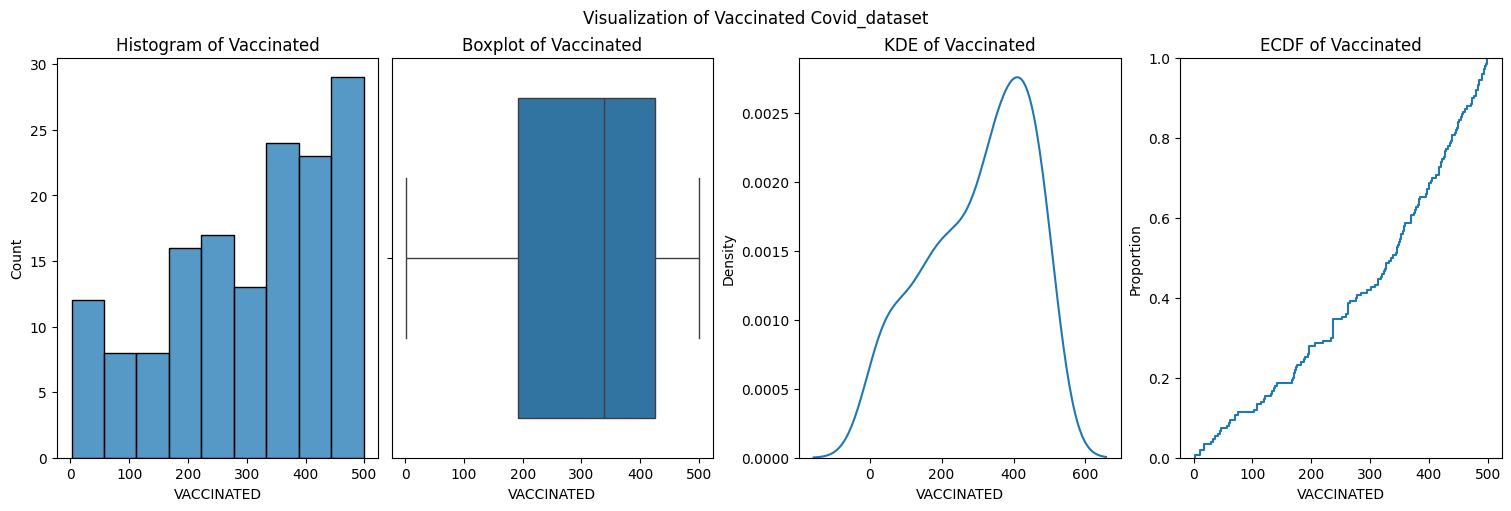

In [ ]:
fig, axs = plt.subplots(1,4, figsize = (15,5), layout= "constrained")
plt.suptitle("Visualization of Vaccinated Covid_dataset")

axs[0].set_title("Histogram of Vaccinated")
sns.histplot(data= New_Covid_dataset, x= "VACCINATED", ax=axs[0])

axs[1].set_title("Boxplot of Vaccinated")
sns.boxplot(data= New_Covid_dataset, x= "VACCINATED", ax=axs[1])

axs[2].set_title("KDE of Vaccinated")
sns.kdeplot(data= New_Covid_dataset, x= "VACCINATED", ax=axs[2])

axs[3].set_title("ECDF of Vaccinated")
sns.ecdfplot(data= New_Covid_dataset, x= "VACCINATED", ax=axs[3]);

plt.show()

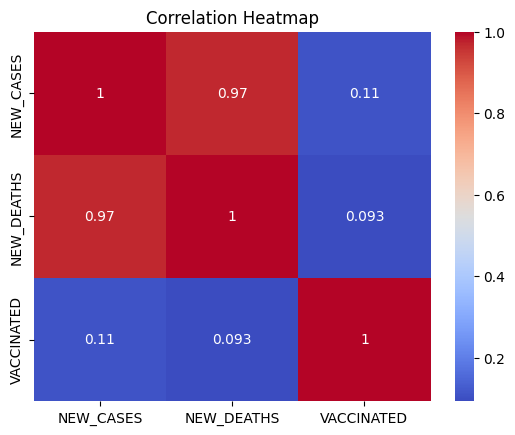

In [ ]:
correlation_matrix = New_Covid_dataset[["NEW_CASES", "NEW_DEATHS", "VACCINATED"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

from the heatmap, New cases has strongest correlation with new deaths and vaccinated. vaccinated has the least correlation.

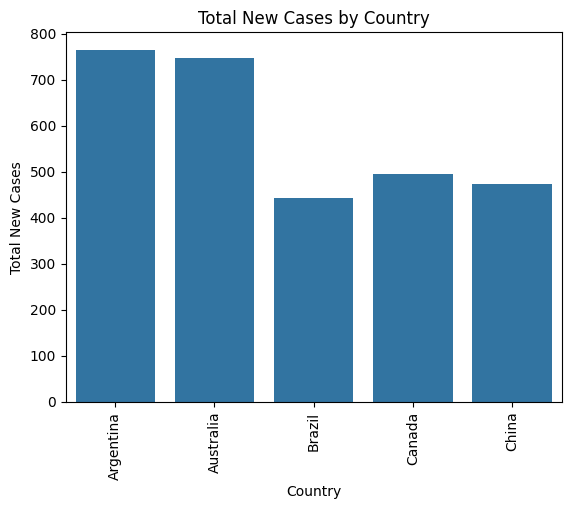

In [ ]:
grouped_data = New_Covid_dataset.groupby("COUNTRY").agg({"NEW_CASES": "mean", "NEW_DEATHS": "mean", "VACCINATED": "mean"})

sns.barplot(x=grouped_data.index, y=grouped_data["NEW_CASES"])
plt.title("Total New Cases by Country")
plt.xlabel("Country")
plt.ylabel("Total New Cases")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Argentina had the Highest Average new cases for Covid followed by Australia , Canada and China with Brazil having the least Average New cases for Covid





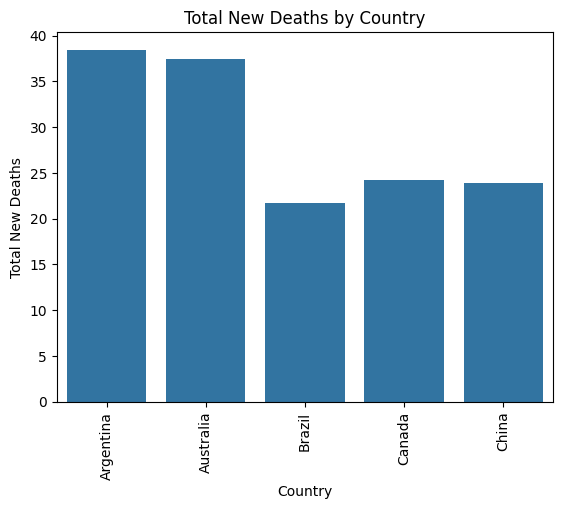

In [ ]:
grouped_data = New_Covid_dataset.groupby("COUNTRY").agg({"NEW_CASES": "mean", "NEW_DEATHS": "mean", "VACCINATED": "mean"})

sns.barplot(x=grouped_data.index, y=grouped_data["NEW_DEATHS"])
plt.title("Total New Deaths by Country")
plt.xlabel("Country")
plt.ylabel("Total New Deaths")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Argentina had the Highest Average new deaths for Covid followed by Australia , Canada and China with Brazil having the least Average New deaths for Covid





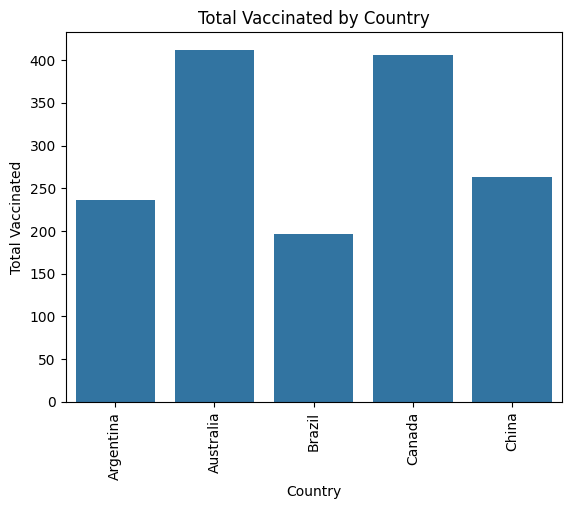

In [ ]:
grouped_data = New_Covid_dataset.groupby("COUNTRY").agg({"NEW_CASES": "mean", "NEW_DEATHS": "mean", "VACCINATED": "mean"})

sns.barplot(x=grouped_data.index, y=grouped_data["VACCINATED"])
plt.title("Total Vaccinated by Country")
plt.xlabel("Country")
plt.ylabel("Total Vaccinated")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Australia had the Highest Average vaccinated for Covid followed by Canada and China and Argentina with Brazil having the least Average vaccinated for Covid





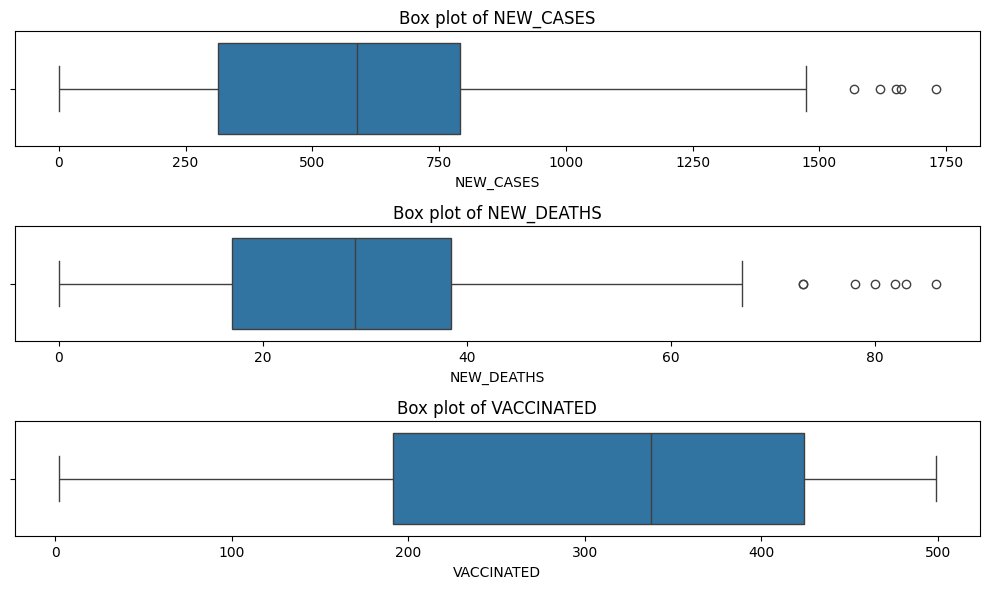

In [ ]:
numerical_columns = New_Covid_dataset.select_dtypes(include = "number").columns

plt.figure(figsize=(10, len(numerical_columns)*2))

for i, col in enumerate(numerical_columns, 1):
     plt.subplot(len(numerical_columns), 1, i)
     sns.boxplot(x= New_Covid_dataset[col])
     plt.title(f"Box plot of {col}")
     plt.tight_layout()

plt.show()


There are no Ouliers for vaccinated while New cases and new deaths had outliers

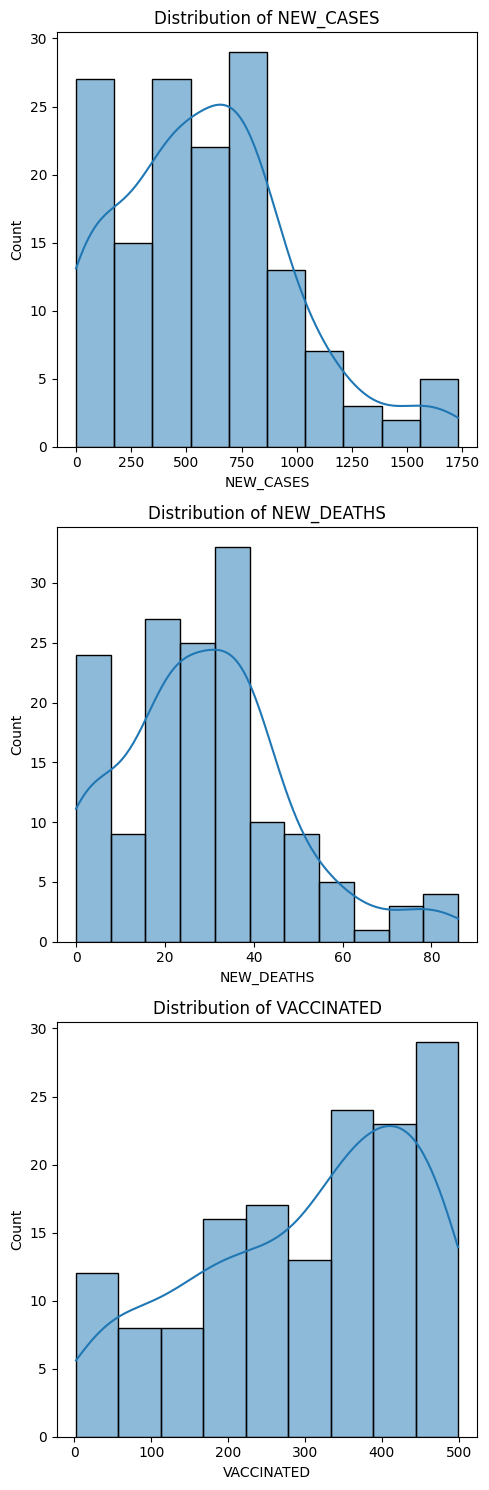

In [ ]:
numerical_columns = New_Covid_dataset.select_dtypes(include = "number").columns

plt.figure(figsize=(5, len(numerical_columns)*5))
for i, col in enumerate(numerical_columns, 1):
     plt.subplot(len(numerical_columns), 1, i)
     sns.histplot(x= New_Covid_dataset[col], kde=True)
     plt.title(f"Distribution of {col}")
     plt.tight_layout()




plt.show()


The distribution of data shows that some countries had very high new cases and very high new deaths and some very low new cases and very low new deaths

The distribution of data for vaccinated shows general distribution with some having a little higher and little lower than others

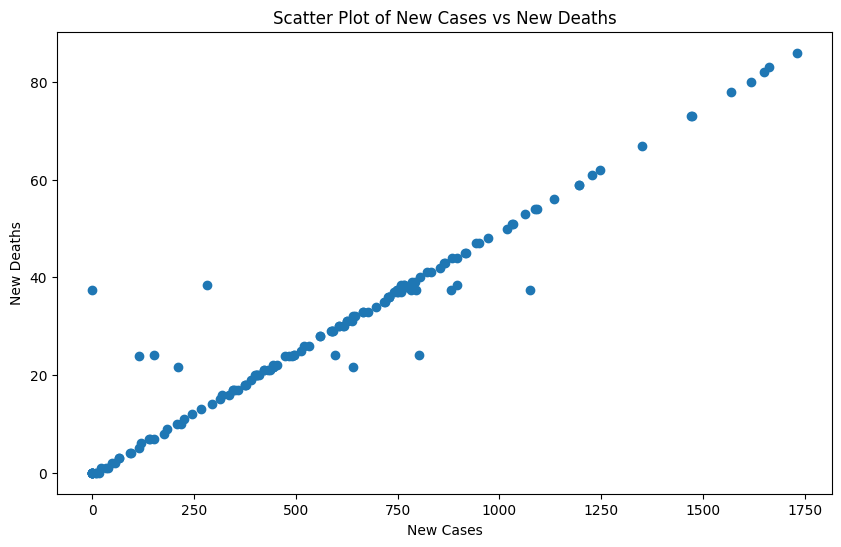

In [ ]:
#scatter plot of New cases and New death
plt.figure(figsize=(10,6))
plt.scatter(New_Covid_dataset["NEW_CASES"], New_Covid_dataset["NEW_DEATHS"])
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.title("Scatter Plot of New Cases vs New Deaths")
plt.show()

There is a strong correlation between New cases and New deaths. As New cases increases , New deaths also increases

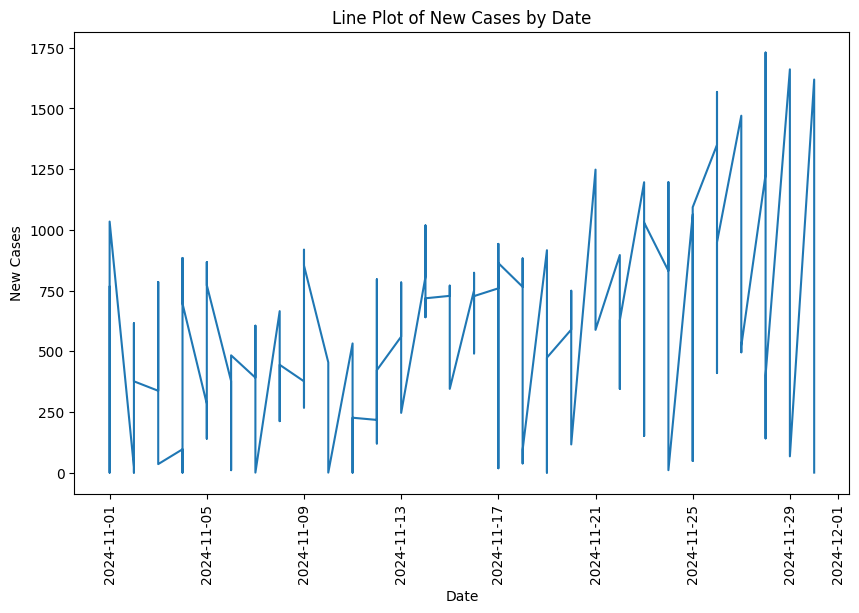

In [ ]:
#line plot of New cases by date
plt.figure(figsize=(10,6))
plt.plot(New_Covid_dataset["DATE"], New_Covid_dataset["NEW_CASES"])
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Line Plot of New Cases by Date")
plt.xticks(rotation=90)
plt.show()

New cases was lower around the first to second week but peaked towards the End of the month

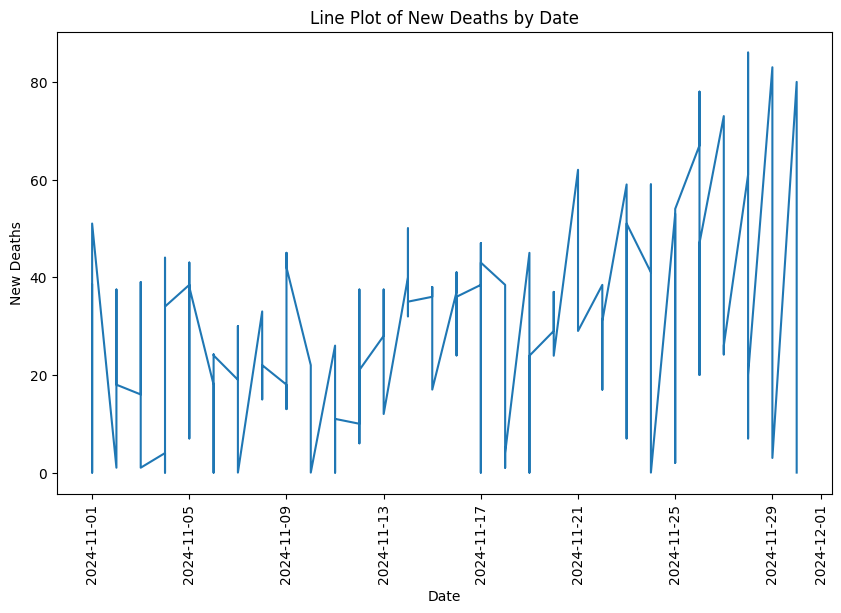

In [ ]:
#line plot of New deaths by date
plt.figure(figsize=(10,6))
plt.plot(New_Covid_dataset["DATE"], New_Covid_dataset["NEW_DEATHS"])
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.title("Line Plot of New Deaths by Date")
plt.xticks(rotation=90)
plt.show()

New deaths was lower around the first to second week but peaked towards the End of the month

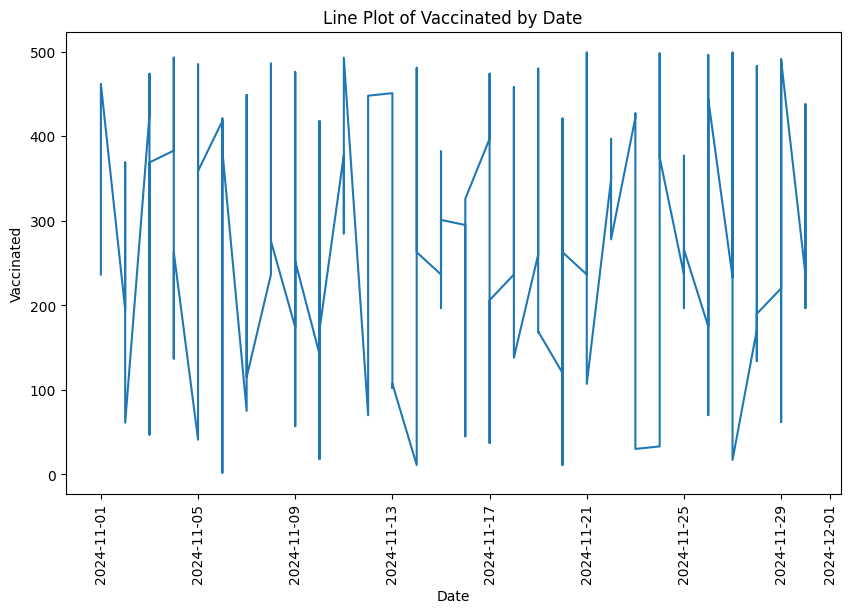

In [ ]:
#line plot of vaccinated by date
plt.figure(figsize=(10,6))
plt.plot(New_Covid_dataset["DATE"], New_Covid_dataset["VACCINATED"])
plt.xlabel("Date")
plt.ylabel("Vaccinated")
plt.title("Line Plot of Vaccinated by Date")
plt.xticks(rotation=90)
plt.show()

#Summary

1.Cleaning
I started by cleaning my Data ensuring there is no missing value, no duplicates and time is in datetime format

2. Explore

I explored the data , summarized to get the mean, median, sum ,std etc

I also grouped the data by country to know countries that had the highest and lowest new cases and new deaths Argentina had tha highest for total new cases and Total new deaths with Brazil having the least for both Total new cases and Total new deaths

For Vaccinated Australia had the highest and brazil had the lowest


3. Visualization

i visualized using box plot, histogram, line plot , scatter plot etc

Over time New deaths and new cases peaked while it was lower at the beginning of the month but higher towards the end of the month

There was a strong positive correlation between new cases and new deaths

vaccinated correlation was low


Recommendation

All other 4 countries especially Argentina and Australia should endeavour to follow Brazil Covid protocols to ensure new cases and deaths are not increasing

Brazil had least vaccinated so it cannot be said that vaccination was the reason for least New cases and new deaths

